# Загрузка библиотек

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm
import re
import statsmodels.api as sm
import statsmodels.formula.api as smf
pd.options.display.max_rows = 20

# Загрузка датасета

In [ ]:
# Подключаем диск
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataA = pd.read_csv('/content/drive/MyDrive/tgu/очищенные.csv')

# 1. Структурированные данные

Каждая строка представляет собой объект -  вакансию, столбцы характиризуюст свойства объекта - краткое наименование, регион, список требуемых специализаций, список требуемых навыков, начальный порог зарплаты, нижний порог зарплаты, опыт работы.

In [ ]:
dataStruct = dataA[['name','name2','region','specializations_list','key_skills_list','salary_from','salary_to', 'experience_shot']]

In [ ]:
dataStruct.index = np.arange(len(dataStruct))

In [ ]:
dataStruct.head() # Посмотрим на датасет

,name,name2,region,specializations_list,key_skills_list,salary_from,salary_to,experience_shot
0,Тестировщик.Net,Тестировщик,Астраханская область,"['Программирование, Разработка', 'Инженер', 'Т...","['Git', 'SQL', 'Тестирование', 'C#', 'API']",25000.0,50000.0,От 1 года до 3 лет
1,Ведущий Специалист по информационным технологиям,Информационные технологии,Астраханская область,"['Компьютерная безопасность', 'Сетевые техноло...","['Пользователь ПК', 'Работа в команде', '1С: П...",26000.0,NaN,Нет опыта
2,Специалист по защите информации,Информационные технологии,Астраханская область,"['Компьютерная безопасность', 'Сетевые техноло...","['MS Dos', 'Диагностика ПК', 'Компьютер', 'Раб...",20000.0,20000.0,Нет опыта
3,Специалист по защите информации,Информационные технологии,Астраханская область,"['Компьютерная безопасность', 'Сетевые техноло...","['Пользователь ПК', 'Работа в команде', 'Грамо...",27000.0,27000.0,Нет опыта
4,Оператор организационного сектора,другое,Астраханская область,"['Компьютерная безопасность', 'Сетевые техноло...","['Пользователь ПК', 'Работа в команде', 'Грамо...",30000.0,30000.0,Нет опыта


# 2. Анализ типов данных

In [ ]:
dataStruct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32737 entries, 0 to 32736
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  32737 non-null  object 
 1   name2                 32737 non-null  object 
 2   region                32737 non-null  object 
 3   specializations_list  32737 non-null  object 
 4   key_skills_list       32737 non-null  object 
 5   salary_from           32737 non-null  float64
 6   salary_to             16054 non-null  float64
 7   experience_shot       32737 non-null  object 
dtypes: float64(2), object(6)
memory usage: 2.2+ MB


Столбцы с данными о предлагаемом уровне зарплаты содержат количественные данные. Данные об опыте работы можно отнести к ранговым. Остальные данные номинальные, при этом сведения о кратких наименованиях вакансии и регионах являются категоризированными.

# 3. Визуализация данных

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5135dfdd0>,
      dtype=object)

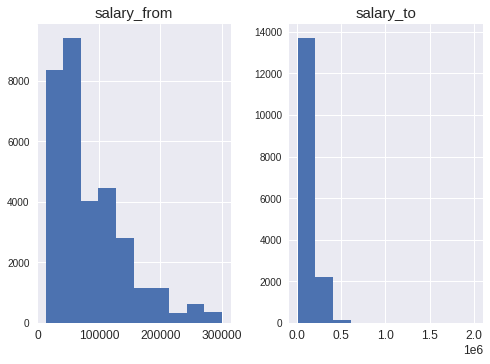

In [ ]:
dataStruct.hist()

In [ ]:
name2_count = dataStruct.groupby('name2').name2.count()

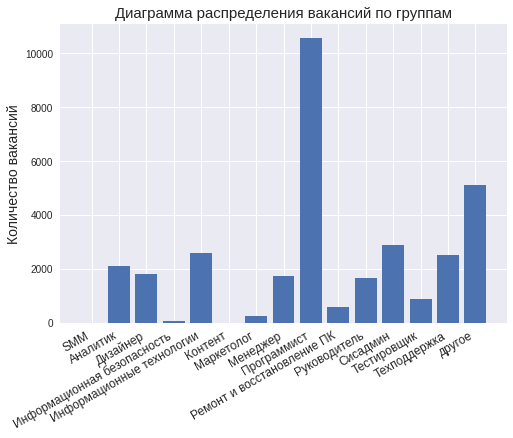

In [ ]:
plt.bar(name2_count.index, name2_count.values)
plt.ylabel('Количество вакансий')
plt.title('Диаграмма распределения вакансий по группам')
plt.xticks(rotation=30, ha = 'right')
plt.show()

In [ ]:
reg_count = dataStruct.groupby('region').region.count()

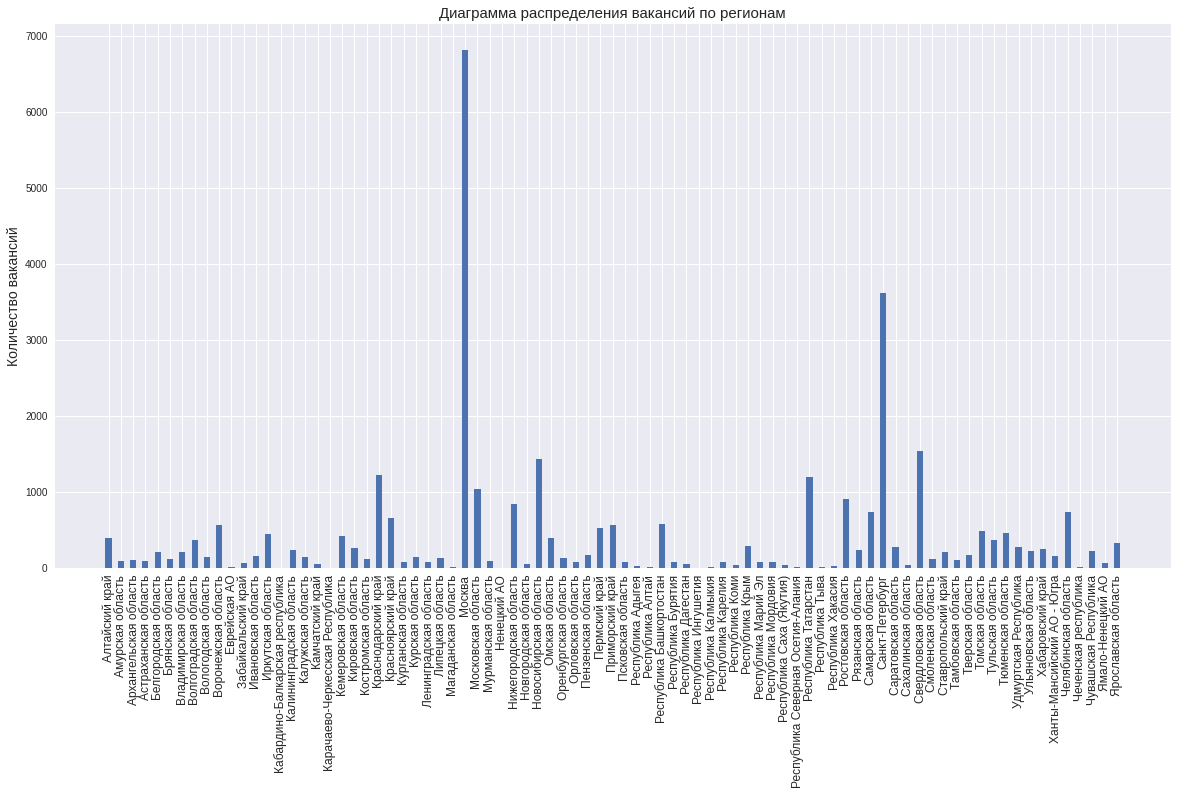

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(reg_count.index, reg_count.values,width=0.5)
plt.ylabel('Количество вакансий')
plt.title('Диаграмма распределения вакансий по регионам')
plt.xticks(rotation=90)
plt.show()

# 4. Проверка гипотезы  о виде распределения

Построим квантиль-квантиль плот и гистограмму для распределения зарплаты.

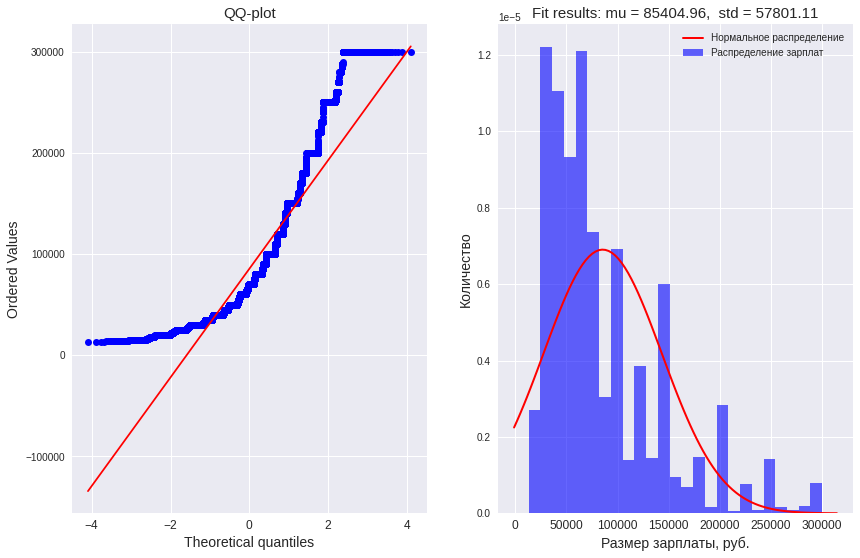

In [ ]:
# Generate some data for this demonstration.
data = dataStruct.salary_from

# Fit a normal distribution to the data:
mu, std = stats.norm.fit(data)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

# Q-Q plot (probability plot)
stats.probplot(data, plot=ax1)
ax1.set_title('QQ-plot')
# Plot the histogram.

ax2.hist(data, bins=25, density=True, alpha=0.6, color='b', label ='Распределение зарплат' )

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax2.plot(x, p, 'k', linewidth=2, color='r', label ='Нормальное распределение')
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
ax2.set_xlabel('Размер зарплаты, руб.')
ax2.set_ylabel('Количество')
plt.title(title)
plt.legend()

plt.show()

Судя по графикам, можно сказать, что распределение начального уровня зарплат далеко от нормального. Проверим нулевую гипотезу о нормальности распределения этого показателя.

In [ ]:
stats.shapiro(dataStruct.salary_from)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.861403226852417, pvalue=0.0)

Критерий Шапиро-Вилко не гарантирует точости значения p-value при объеие наблюдений более 5000. Поэтому применим другие критерии.

In [ ]:
 stats.jarque_bera(dataStruct.salary_from) # Критерий Жарка-Бера

Jarque_beraResult(statistic=14914.252532918952, pvalue=0.0)

In [ ]:
stats.chisquare(dataStruct.salary_from)  # Критерий согласия Пирсона хи-квадрат

Power_divergenceResult(statistic=1280643047.0140224, pvalue=0.0)

In [ ]:
stats.kstest(dataStruct.salary_from,stats.norm.cdf)# Критерий согласия Колмогорова(-Смирнова)

KstestResult(statistic=1.0, pvalue=0.0)

Все примененные критерии дают паказатели pvalue = 0, меньше 0,05. Значит нулевую гипотезу о нармальности распределения зарплаты отклоняем.

# 5. Оценка связи между показателями

Проранжируем значение столбца опыт работы и посмотрим, есть ли связь между показателями уровня заработной платы и имеющегося опыта работы.

In [ ]:
level_map = {'Нет опыта': 0, 'От 1 года до 3 лет': 1, 'От 3 до 6 лет': 2, 'Более 6 лет':3}
dataStruct['experience_r'] = dataStruct['experience_shot'].map(level_map)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


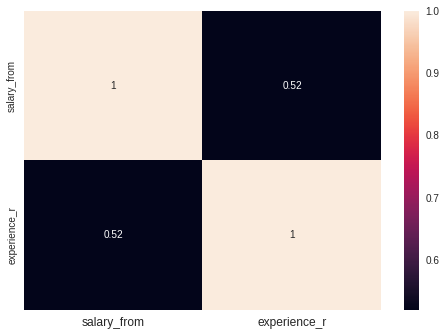

In [ ]:
ran = ['salary_from','experience_r']
hm = sns.heatmap(dataStruct[ran].corr(method = 'spearman'), annot=True)

In [ ]:
scipy.stats.spearmanr(dataStruct.salary_from, dataStruct.experience_r)

SpearmanrResult(correlation=0.5187961947698746, pvalue=0.0)

Наблюдается хоть и не сильно высокая (r = 0.52), но статистически значимая прямая зависимость уровня зарплаты от опыта работы.

# 6. Сравнение групп

## Группы вакансий по краткому наименованию

Сравним средние значения нижнего порога зарплаты для групп вакансий.

In [ ]:
salary_vac = dataStruct[['name2','salary_from']]

In [ ]:
pd.set_option('display.max_rows',20)

In [ ]:
salary_vac.groupby('name2')[['salary_from']].mean()

,salary_from
name2,
SMM,61000.000000
Аналитик,95389.748924
Дизайнер,56673.614872
Информационная безопасность,73675.117647
Информационные технологии,67538.194519
Контент,56250.000000
Маркетолог,57765.380567
Менеджер,68564.931034
Программист,108711.916485


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


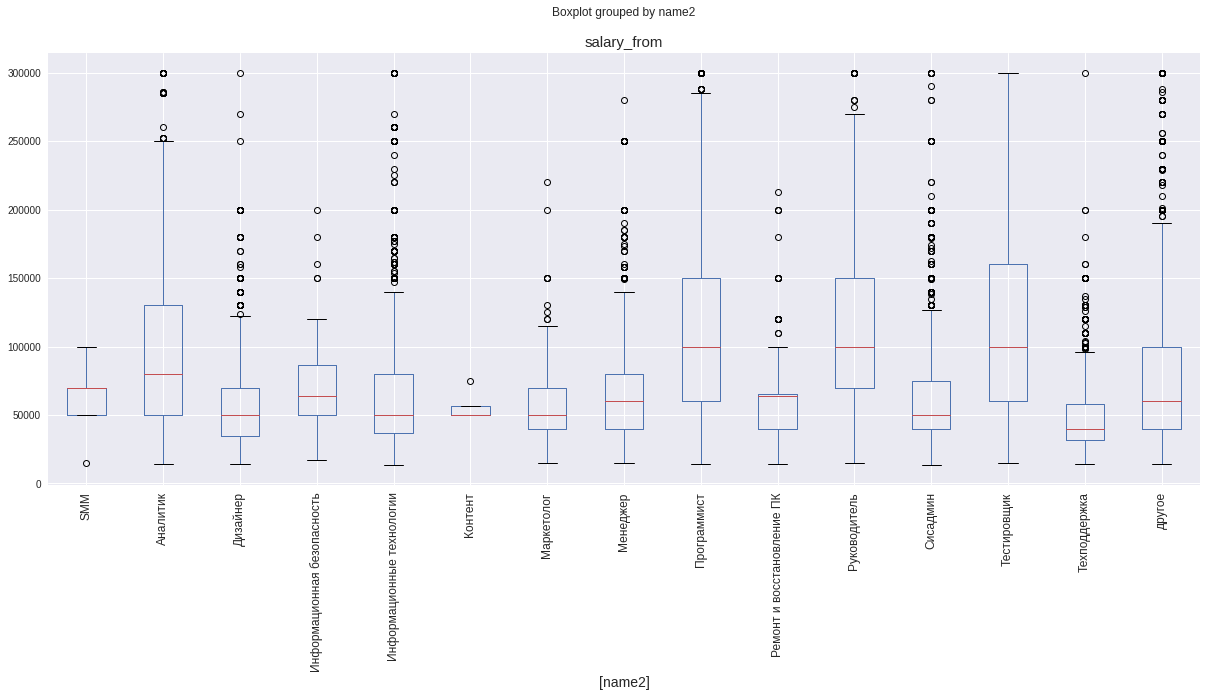

In [ ]:
salary_vac.boxplot(by = 'name2',figsize = (20,8),rot = 90) # Боксплот зарплаты по группам вакансий

Судя по графику, распределения зарплаты внутри групп весьма различны и  по  медианным значениям, и по размаху и по межквартильным значениям. Наиболее высокие зарплаты можно отметить в группах таких вакансий как Пограммист, Тестировщик и Руководитель. При этом в группеТестировщик самый большой размах и отсутсвуют выбросы. Следовательно. в этой группе значения зарплат наиболее сбалансированы.

In [ ]:
label, idx = np.unique(salary_vac.name2, return_inverse=True) # Найдем уникальные группы вакансий и индексы строк, им принадлежащие
groups = [salary_vac.salary_from[idx == i] for i, l in enumerate(label)]  # Распределим значения зарплаты по группам с уникальной вакансией

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4eb0e3790>,
      dtype=object)

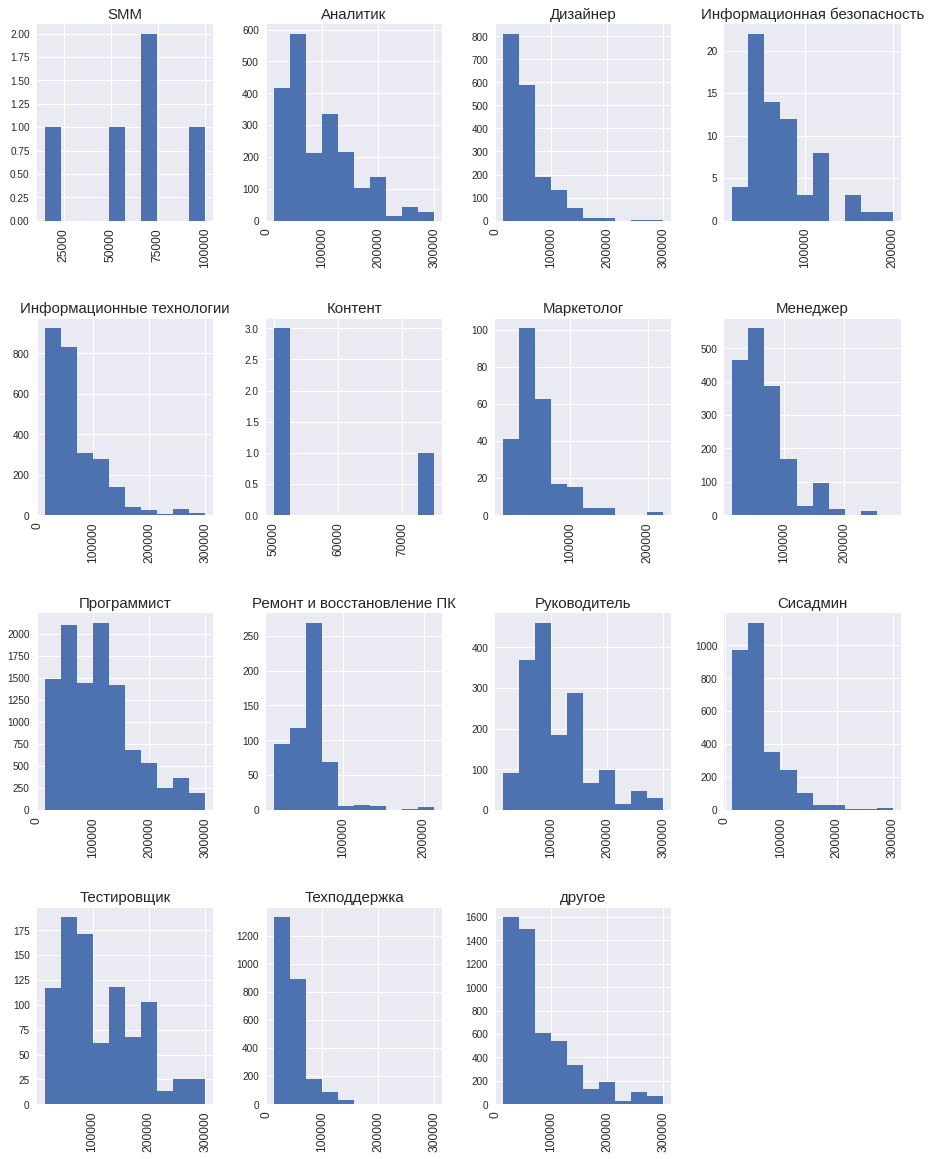

In [ ]:
salary_vac.hist(by = 'name2',figsize = (15,20)) # Построим гистограммы распределения зарплаты по группам вакансий

In [ ]:
# Проверим нормальность распределения зарплаты внутри групп при помощи критерия Колмогорова-Смирнова
for i,l in enumerate(label):
  print(l , ' - ', stats.kstest(groups[i], stats.norm.cdf))

SMM  -  KstestResult(statistic=1.0, pvalue=0.0)
Аналитик  -  KstestResult(statistic=1.0, pvalue=0.0)
Дизайнер  -  KstestResult(statistic=1.0, pvalue=0.0)
Информационная безопасность  -  KstestResult(statistic=1.0, pvalue=0.0)
Информационные технологии  -  KstestResult(statistic=1.0, pvalue=0.0)
Контент  -  KstestResult(statistic=1.0, pvalue=0.0)
Маркетолог  -  KstestResult(statistic=1.0, pvalue=0.0)
Менеджер  -  KstestResult(statistic=1.0, pvalue=0.0)
Программист  -  KstestResult(statistic=1.0, pvalue=0.0)
Ремонт и восстановление ПК  -  KstestResult(statistic=1.0, pvalue=0.0)
Руководитель  -  KstestResult(statistic=1.0, pvalue=0.0)
Сисадмин  -  KstestResult(statistic=1.0, pvalue=0.0)
Тестировщик  -  KstestResult(statistic=1.0, pvalue=0.0)
Техподдержка  -  KstestResult(statistic=1.0, pvalue=0.0)
другое  -  KstestResult(statistic=1.0, pvalue=0.0)


Данные количественные, нормальному закону не подчиняются, количество групп больше двух. Выбираем критерий Краскала-Уолиса

In [ ]:
H, p = stats.kruskal(*groups) # Рассчитаем критерий Краскала-Уолиса
print('H =',H,' p-value =', p) # Распечаем результат

H = 5848.98025318559  p-value = 0.0


Значение p-value = 0.0, это меньше 0.05, значит нулевая гипотеза о равенстве средних отвергается и различия зарплаты в группах вакансий статистически значимы.

## Группы вакансий по регионам

In [ ]:
salary_reg = dataStruct[['salary_from','region']] # Создадим фрейм с интересующими нас данными

In [ ]:
salary_reg.groupby('region')[['salary_from']].mean() # Средние значения зарплат по регионам зрительно весьма различаются

,salary_from
region,
Алтайский край,60236.548223
Амурская область,52615.294118
Архангельская область,57760.194175
Астраханская область,69141.614458
Белгородская область,65366.200000
...,...
Челябинская область,69851.789041
Чеченская республика,98000.000000
Чувашская Республика,48075.733333


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


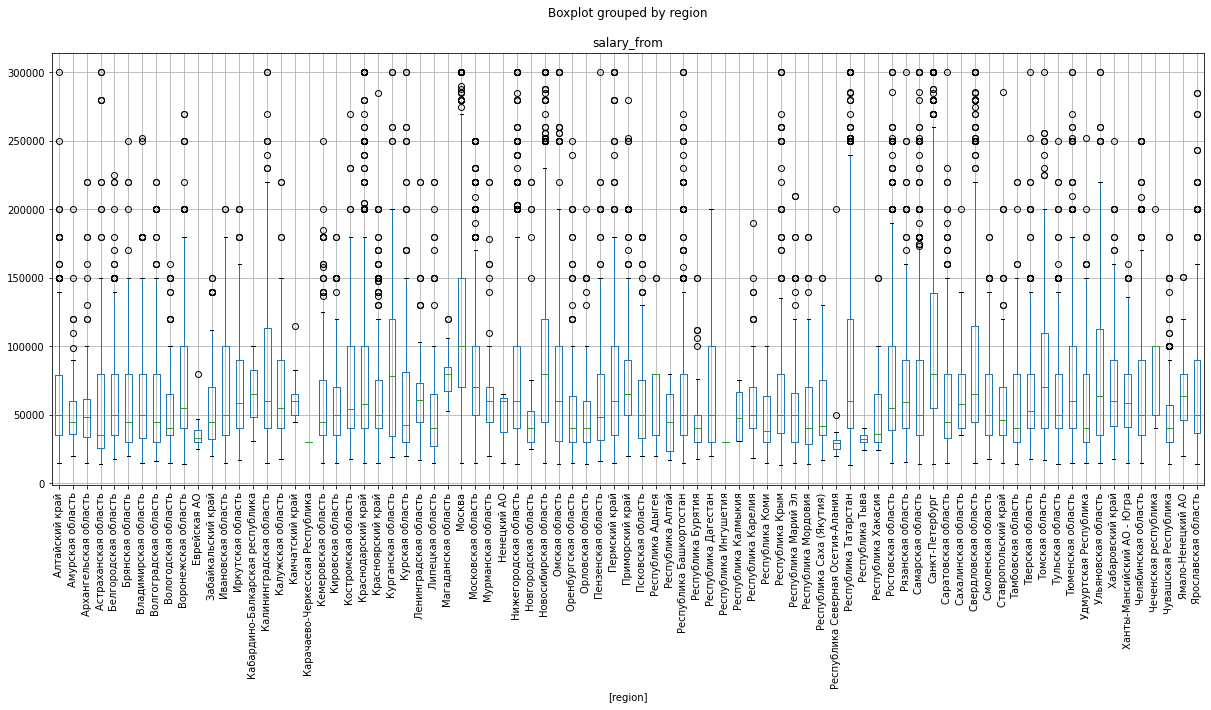

In [ ]:
salary_reg.boxplot(by = 'region',figsize = (20,8),rot = 90) # Боксплот зарплаиы по регионам

In [ ]:
labelr, idxr = np.unique(salary_reg.region, return_inverse=True) # Найдем уникальные группы вакансий и индексы строк, им принадлежащие
groupsr = [salary_reg.salary_from[idxr == i] for i, l in enumerate(labelr)]  # Рас

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9af91b8590>,
      dtype=object)

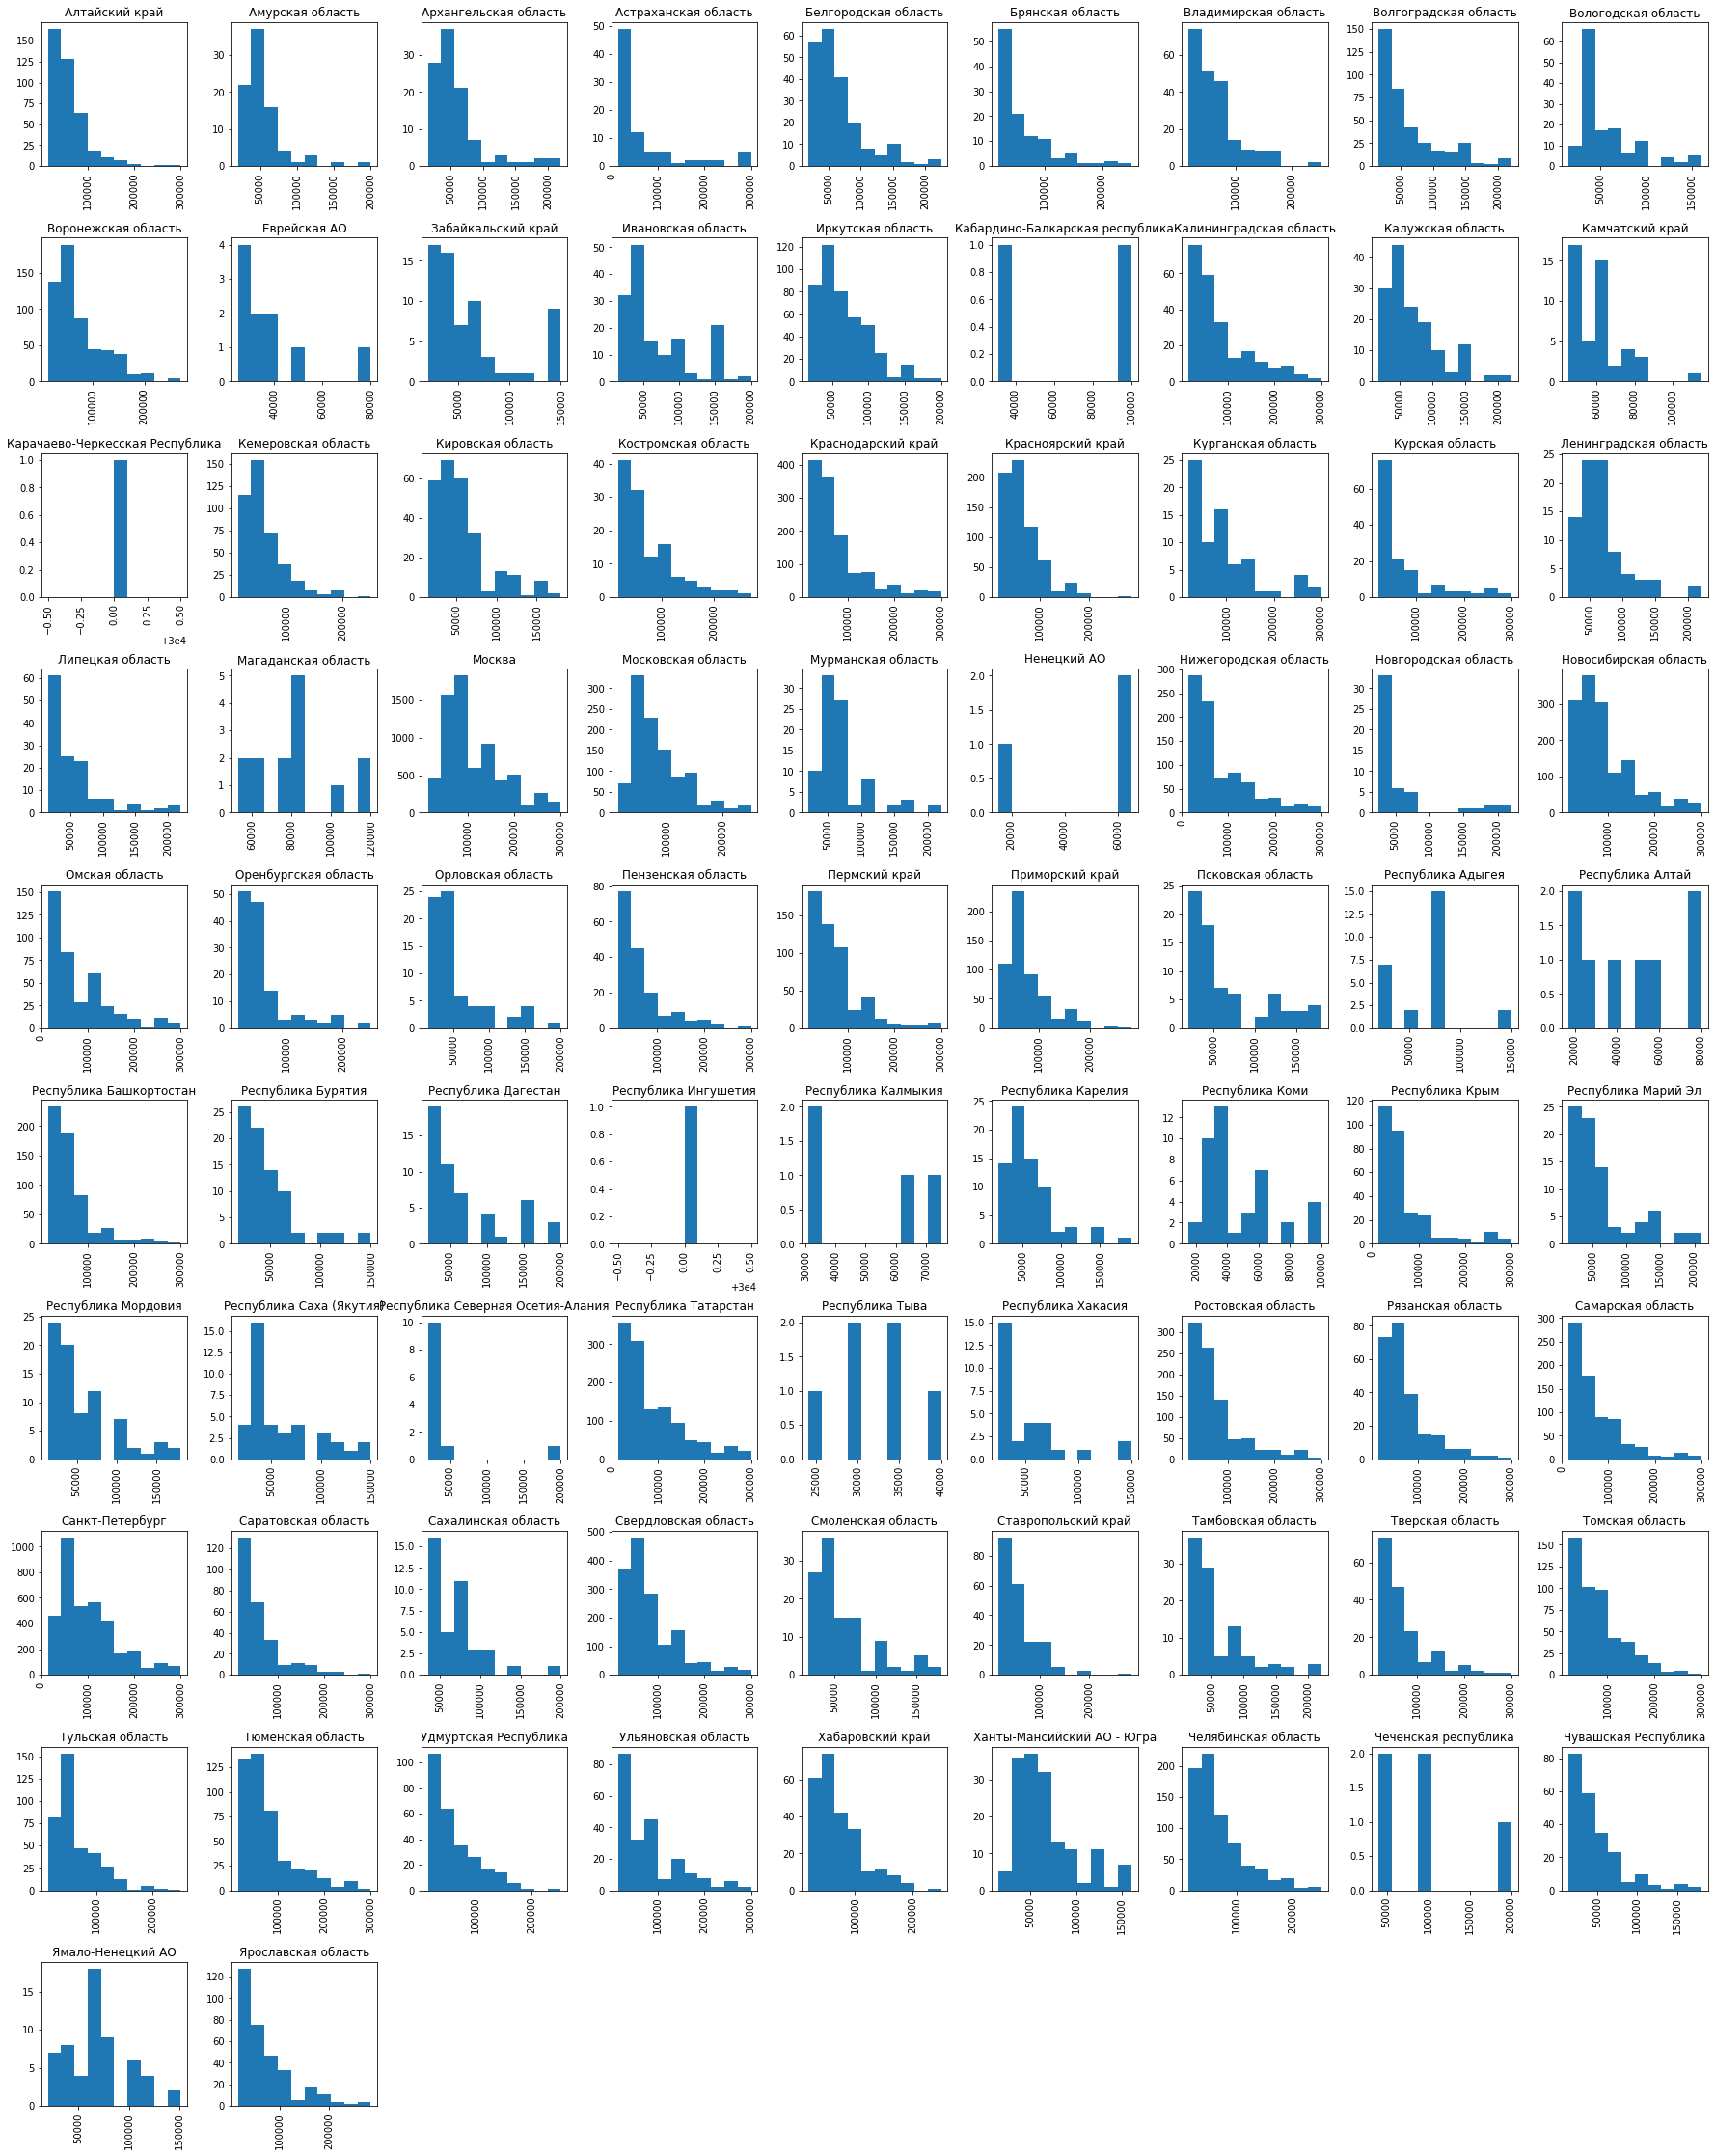

In [ ]:
salary_reg.hist(by = 'region',figsize = (30,40)) # Гистограммы распределения зарплаты по регионам

In [ ]:
H, p = stats.kruskal(*groupsr) # Рассчитаем критерий Краскала-Уолиса
print('H =',H,' p-value =', p) # Распечаем результат

H = 4809.131104261268  p-value = 0.0


Нулевую гипотезу об отсутствии значимых различий в средней зарплате у групп вакансий по регионам отвергаем (p-value < 0,05). Следовательно, различия в зарплатах для вакансий в различных регионах статистически значимы.

# 7. Гипотеза

#### Анализ данных

Рассмотрим, какие ключевые навыки в IT наиболее часто встречаются в вакансиях программистов

In [ ]:
skills = dataA['key_skills_list'][dataA['name2']=='Программист']

Создадим словарь с частотами встречающихся навыков

In [ ]:
skillsDict={}
for sl in skills:
  for s in eval(sl):
    sm = skillsDict.get(s)
    if sm is None: skillsDict[s] = 1
    else: skillsDict[s] = sm+1

In [ ]:
Skills = pd.DataFrame(list(skillsDict.items()), # создадим датафрем
                   columns=['Навыки', 'Частота_упоминания']).sort_values(by='Частота_упоминания', ascending=False)

In [ ]:
Skills.index = np.arange(len(Skills)) # Переиндексируем набор данных

In [ ]:
Skills.Навыки.head(20) # Посмотрим на топ-5 навыков по частоте упоминания

0                                      Git
1                      1С программирование
2                               JavaScript
3                                      SQL
4                                      PHP
5                        1С: Предприятие 8
6                                      ООП
7                                    MySQL
8                                     HTML
9                               PostgreSQL
10                                     CSS
11                                   Linux
12    1С: Зарплата и управление персоналом
13                     1С: Документооборот
14                1С: Управление Торговлей
15                                      C#
16                         1С: Бухгалтерия
17                                    Java
18                                  Python
19                                  MS SQL
Name: Навыки, dtype: object

In [ ]:
salary_skills = dataStruct[['salary_from','key_skills_list']] # Создадим датафрейм с интересующими столбцами

In [ ]:
salary_skills.head()

,salary_from,key_skills_list
0,25000.0,"['Git', 'SQL', 'Тестирование', 'C#', 'API']"
1,26000.0,"['Пользователь ПК', 'Работа в команде', '1С: П..."
2,20000.0,"['MS Dos', 'Диагностика ПК', 'Компьютер', 'Раб..."
3,27000.0,"['Пользователь ПК', 'Работа в команде', 'Грамо..."
4,30000.0,"['Пользователь ПК', 'Работа в команде', 'Грамо..."


In [ ]:
def hasGit(s):# Функция проверки на вхождение подстроки GIT
  return ('git' in s.lower())

In [ ]:
git = salary_skills['key_skills_list'].apply(hasGit) # Фильтр

In [ ]:
salary_skills['GIT'] = 0 # Создадим столбец GIT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
salary_skills.loc[git,'GIT']= 1 # Заполним 1, если встречается GIT

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


### Формулировка гипотезы

***Гипотеза:*** владение навыками GIT статистически значимо повышает уровень зарплаты в IT-вакансиях.

### Структурированные данные для проверки гипотезы

In [ ]:
gitYN = salary_skills[['salary_from','GIT']]

### Тип данных

In [ ]:
gitYN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32737 entries, 0 to 32736
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   salary_from  32737 non-null  float64
 1   GIT          32737 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 767.3 KB


### Визуализация

In [ ]:
gitYN.groupby('GIT').mean()

,salary_from
GIT,
0,80340.302004
1,125260.834462


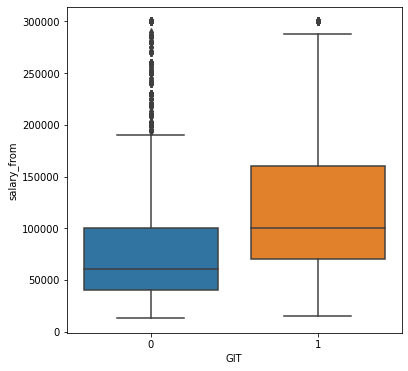

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='GIT', y='salary_from', data=gitYN)

Визуализация показывает существенную разницу зарплат в рассмотренных группах вакансий. Для вакансий, требующих владения GIT, средние зарплаты выше.

### Выбранный метод анализа

Данные количественные, нормальному закону не подчиняются, две группы. Для сравнения групп выбираем критерии Манна-Уитни и Колмогорова-Смирнова.

### Результат реализации метода

In [ ]:
scipy.stats.mannwhitneyu(gitYN[gitYN.GIT==1].salary_from, gitYN[gitYN.GIT==0].salary_from)

MannwhitneyuResult(statistic=76326610.5, pvalue=0.0)

In [ ]:
stats.kstest(gitYN[gitYN.GIT==1].salary_from, gitYN[gitYN.GIT==0].salary_from)

KstestResult(statistic=0.33564511214593923, pvalue=0.0)

### Вывод

Оба примененных критерия позволяют отвергнуть нулевую гипотезу об отсутствии значимых различий средних зарплат в вакансиях, требующих знания GIT и остальных. Следовательно, владение навыками GIT статистически значимо повышает уровень зарплаты.

# 8. Модель связи уровня зарплаты от ключевых навыков

## Подготовка данных

In [ ]:
# Сщздадим функцию поиска регулярного выражения в строке
def findreg(st):
  return len(regex.findall(st)) > 0

In [ ]:
# Создадим словарь, где для основных IT-навыков в качестве значений выступает шаблон регулярного выражения для поиска навыка в строке
sk_dict = {'SQL':'.*\'sql\'.*','PHP':'.*php.*','LINUX':'.*linux.*','ОдинС':'.*1\s*[с,c].*',
           'JavaScript':'.*javascript.*','HTML':'.*html.*','CSS':'.*css.*','СиШарп':'.*\'c\#\'.*','СиПлюсПлюс':'.*c\s*\+\+.*',
           'React':'.*react.*','JAVA':'.*\'java\'.*','Python':'.*python.*','Docker':'.*docker.*','REST':'.*rest.*','XML':'.*xml.*',
           'MySQL':'.*my\s*sql.*','MariaDB':'.*maria\s*db.*','ORACLE':'.*oracle.*','MSSQL':'.*ms\s*sql.*','Postgre':'.*postgre.*'}

In [ ]:
# В цикле создаем столбцы для каждого навыка из словаря,
# значение равно 1, если навык присутствует в столбце 'key_skills_list' и ноль в противном случае
for k,v in sk_dict.items():
  regex = re.compile(v)
  filtr =  salary_skills.key_skills_list.str.lower().apply(findreg)
  salary_skills[k] = 0
  salary_skills.loc[filtr,k]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
salary_skills.head()

,salary_from,key_skills_list,GIT,SQL,PHP,LINUX,ОдинС,JavaScript,HTML,CSS,...,JAVA,Python,Docker,REST,XML,MySQL,MariaDB,ORACLE,MSSQL,Postgre
0,25000.0,"['Git', 'SQL', 'Тестирование', 'C#', 'API']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26000.0,"['Пользователь ПК', 'Работа в команде', '1С: П...",0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20000.0,"['MS Dos', 'Диагностика ПК', 'Компьютер', 'Раб...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27000.0,"['Пользователь ПК', 'Работа в команде', 'Грамо...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30000.0,"['Пользователь ПК', 'Работа в команде', 'Грамо...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
salary_skills.to_csv('зарплата_навыки.csv')

## Построение модели

In [ ]:
# Построим модель влияния ключевых навыков на размер зарплаты
resultsm = smf.ols('salary_from ~ PHP + JAVA + JavaScript + ОдинС + СиШарп + СиПлюсПлюс + SQL + HTML + CSS + MySQL + ORACLE + MSSQL + MariaDB + Postgre + GIT + REST + LINUX + Python + Docker +  React + XML ', data=salary_skills).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            salary_from   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     263.0
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        09:27:49   Log-Likelihood:            -4.0285e+05
No. Observations:               32737   AIC:                         8.057e+05
Df Residuals:                   32715   BIC:                         8.059e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.344e+04    384.952    190.771      0.000    7.27e+04    7.42e+04
PHP        -1564.5508   1675.609     -0.934      0.350   -4848.805    1719.704
JAVA        3.662e+04   1782.015     20.552      0.000    3.31e+04    4.01e+04
JavaScript  1644.7553   1530.161      1.075      0.282   -1354.417    4643.927
ОдинС       1.248e+04    791.073     15.774      0.000    1.09e+04     1.4e+04
СиШарп      1.336e+04   1849.478      7.225      0.000    9738.336     1.7e+04
СиПлюсПлюс  3818.4278   1902.977      2.007      0.045      88.523    7548.332
SQL         1.261e+04   1094.682     11.518      0.000    1.05e+04    1.48e+04
HTML       -1.268e+04   1879.137     -6.746      0.000   -1.64e+04   -8994.346
CSS        -5790.8926   2105.153     -2.751      0.006   -9917.070   -1664.716
MySQL       1.031e+04   1668.558      6.180      0.000    7042.073    1.36e+04
ORACLE      1.041e+04   2918.720      3.565      0.000    4684.349    1.61e+04
MSSQL       2833.1769   1496.925      1.893      0.058    -100.851    5767.205
MariaDB    -2.246e+04   8537.584     -2.631      0.009   -3.92e+04   -5725.605
Postgre     2.078e+04   1472.809     14.111      0.000    1.79e+04    2.37e+04
GIT         2.457e+04   1125.410     21.829      0.000    2.24e+04    2.68e+04
REST        2.445e+04   2057.848     11.881      0.000    2.04e+04    2.85e+04
LINUX      -1696.9887   1059.269     -1.602      0.109   -3773.195     379.218
Python       2.32e+04   1548.119     14.987      0.000    2.02e+04    2.62e+04
Docker       3.86e+04   2050.079     18.828      0.000    3.46e+04    4.26e+04
React       3.932e+04   2206.076     17.822      0.000     3.5e+04    4.36e+04
XML         7811.4594   2490.398      3.137      0.002    2930.189    1.27e+04
==============================================================================
Omnibus:                     6992.894   Durbin-Watson:                   1.416
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14275.167
Skew:                           1.273   Prob(JB):                         0.00
Kurtosis:                       4.996   Cond. No.                         30.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Статистически незначимым яаляется влияние таких навыков, как PHP(pvalue = 0.350), JavaScript(pvalue = 0.282), MSSQL(pvalue = 0.058), LINUX(pvalue = 0.109).Исключим их из модели.


In [ ]:
resultsm = smf.ols('salary_from ~ JAVA  + ОдинС + СиШарп + СиПлюсПлюс + SQL + HTML + CSS + MySQL + ORACLE  + MariaDB + Postgre + GIT + REST + Python + Docker +  React + XML ', data=salary_skills).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            salary_from   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     324.4
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        09:31:28   Log-Likelihood:            -4.0286e+05
No. Observations:               32737   AIC:                         8.057e+05
Df Residuals:                   32719   BIC:                         8.059e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.337e+04    375.860    195.205      0.000    7.26e+04    7.41e+04
JAVA        3.659e+04   1777.280     20.588      0.000    3.31e+04    4.01e+04
ОдинС       1.265e+04    785.514     16.098      0.000    1.11e+04    1.42e+04
СиШарп      1.417e+04   1824.319      7.768      0.000    1.06e+04    1.77e+04
СиПлюсПлюс  3479.5267   1888.334      1.843      0.065    -221.677    7180.731
SQL         1.304e+04   1060.766     12.294      0.000     1.1e+04    1.51e+04
HTML       -1.252e+04   1854.894     -6.747      0.000   -1.62e+04   -8879.583
CSS        -5375.1764   2032.042     -2.645      0.008   -9358.053   -1392.300
MySQL       9524.4437   1383.022      6.887      0.000    6813.670    1.22e+04
ORACLE      1.066e+04   2914.633      3.656      0.000    4944.181    1.64e+04
MariaDB    -2.276e+04   8530.274     -2.668      0.008   -3.95e+04   -6042.870
Postgre     2.085e+04   1457.742     14.306      0.000     1.8e+04    2.37e+04
GIT         2.443e+04   1096.762     22.271      0.000    2.23e+04    2.66e+04
REST        2.442e+04   2054.371     11.889      0.000    2.04e+04    2.85e+04
Python      2.285e+04   1529.178     14.940      0.000    1.98e+04    2.58e+04
Docker      3.787e+04   2021.382     18.735      0.000    3.39e+04    4.18e+04
React       4.026e+04   2101.916     19.152      0.000    3.61e+04    4.44e+04
XML         8045.1625   2487.531      3.234      0.001    3169.510    1.29e+04
==============================================================================
Omnibus:                     6993.300   Durbin-Watson:                   1.415
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14271.438
Skew:                           1.273   Prob(JB):                         0.00
Kurtosis:                       4.994   Cond. No.                         30.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

В полученной модели теряет значимость такой навык, как С++. Исключим и его.

In [ ]:
resultsm = smf.ols('salary_from ~ JAVA  + ОдинС + СиШарп + SQL + HTML + CSS + MySQL + ORACLE  + MariaDB + Postgre + GIT + REST + Python + Docker +  React + XML ', data=salary_skills).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            salary_from   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     344.4
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        09:33:16   Log-Likelihood:            -4.0286e+05
No. Observations:               32737   AIC:                         8.057e+05
Df Residuals:                   32720   BIC:                         8.059e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.344e+04    373.744    196.507      0.000    7.27e+04    7.42e+04
JAVA        3.673e+04   1775.807     20.682      0.000    3.32e+04    4.02e+04
ОдинС       1.262e+04    785.415     16.067      0.000    1.11e+04    1.42e+04
СиШарп      1.445e+04   1818.221      7.946      0.000    1.09e+04     1.8e+04
SQL         1.305e+04   1060.782     12.306      0.000     1.1e+04    1.51e+04
HTML       -1.252e+04   1854.960     -6.750      0.000   -1.62e+04   -8884.268
CSS        -5463.2360   2031.554     -2.689      0.007   -9445.157   -1481.316
MySQL       9499.2451   1383.005      6.869      0.000    6788.505    1.22e+04
ORACLE      1.063e+04   2914.708      3.648      0.000    4918.966    1.63e+04
MariaDB    -2.292e+04   8530.173     -2.687      0.007   -3.96e+04   -6197.845
Postgre     2.073e+04   1456.290     14.237      0.000    1.79e+04    2.36e+04
GIT         2.459e+04   1093.341     22.488      0.000    2.24e+04    2.67e+04
REST        2.429e+04   2053.116     11.830      0.000    2.03e+04    2.83e+04
Python      2.315e+04   1520.186     15.229      0.000    2.02e+04    2.61e+04
Docker      3.769e+04   2019.028     18.667      0.000    3.37e+04    4.16e+04
React       4.022e+04   2101.879     19.133      0.000    3.61e+04    4.43e+04
XML         8016.0642   2487.572      3.222      0.001    3140.332    1.29e+04
==============================================================================
Omnibus:                     6997.718   Durbin-Watson:                   1.415
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14281.515
Skew:                           1.274   Prob(JB):                         0.00
Kurtosis:                       4.994   Cond. No.                         30.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Интерпретация результатов

Линейная модель показывает слабую степень связи уровня зарплаты от ключевых навыков (R^2 = 0.144). Обратную зависимость имеют показывают навыки MariaDB, HTML и CSS. Прификсированных значениях других навыков, владение ими снизило бы уровень предлагаемой зарплаты  на 29220, 12520 и 5463 рублей соответственно. Влияние остальных факторов прямое, владение этими навыками приводит к росту зарплаты. Наибольший вклад в рост заработной платы вносит владение такими навыками, как React, Docker и Java (увеличение на 40220, 37690 и 36730 руб. соответсвенно). Около 25 тыс.руб. может добавить  зарплате владение GIT, REST или Python.

## Построение прогноза

In [ ]:
# Сохраним парамеры модели
rp = resultsm.params

In [ ]:
# Список факторов
rp.index

Index(['Intercept', 'JAVA', 'ОдинС', 'СиШарп', 'SQL', 'HTML', 'CSS', 'MySQL',
       'ORACLE', 'MariaDB', 'Postgre', 'GIT', 'REST', 'Python', 'Docker',
       'React', 'XML'],
      dtype='object')

In [ ]:
# Допустим,  я владею 'SQL', 'HTML', 'CSS', 'ORACLE','GIT', 'REST', 'Python', 'Docker','XML'
MySkills = pd.array([1,0,0,0,1,1,1,0,1,0,0,1,1,1,1,0,1]) # Вектор моих навыков

In [ ]:
MySalary = np.dot(rp,MySkills) # Расчет прогнозной величины заработной платы
print(f'Прогноз зарплаты:{MySalary:.2f} руб.')

Прогноз зарплаты:196876.45 руб.


# Выводы

Распределение единственного количественного признака в изученном датасете - зарплаты - не  подчиняется нормальному закону. Показаны статически обусловленные различия зарплаты в группах вакансий по региону и по типу вакансий. Чуть выше среднего (52%) уровень зарплаты коррелирует с опытом работы, это значит шансы получить вакансию с одинаковой зарплатой почти одинаковы как для начинающих, так и для опытных соискателей. Доказана гипотеза, что владение GIT способствует росту прдлагаемых зарплат в представленных вакансиях. Построена многофакторная регрессионная модель зависимости уровн зарплаты от владения основным IT-навыками. Линейная связь выражена слабоб - коэффициент детерминации равен 0,144, но влияния факторов статитичски значимо. Наибольший вклад в рост зарплаты вносят такие навыки, как React, Docker и Java.